In [66]:
#import depencecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [55]:
# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [56]:
# create a set of randomg latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [57]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [58]:
from citipy import citipy

In [59]:
# create a list [] for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [28]:
# Create an empty list to hold the weather data.
city_data = []
print("Beggining Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beggining Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | maragogi
Processing Record 2 of Set 1 | pozo colorado
Processing Record 3 of Set 1 | shenjiamen
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | pierre
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | tarauaca
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | markova
Processing Record 12 of Set 1 | lipari
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | plettenberg bay
Processing Record 16 of Set 1 | san isidro
Processing Record 17 of Set 1 | bela vista
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | loughton
Processing

Processing Record 36 of Set 4 | sorvag
City not found. Skipping...
Processing Record 37 of Set 4 | camana
Processing Record 38 of Set 4 | lima
Processing Record 39 of Set 4 | labuhan
Processing Record 40 of Set 4 | santa cruz
Processing Record 41 of Set 4 | vung tau
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | dosso
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | tautira
Processing Record 49 of Set 4 | kumano
Processing Record 50 of Set 4 | taoudenni
Processing Record 1 of Set 5 | chodavaram
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | zunyi
Processing Record 4 of Set 5 | iberia
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | vanimo
Processing Record 7 of Set 5 | ozernovskiy
Processing Record 8 of Set 5 | turukhansk
Processing Record 9 of Set 5

Processing Record 21 of Set 8 | lubango
Processing Record 22 of Set 8 | firminy
Processing Record 23 of Set 8 | wahran
City not found. Skipping...
Processing Record 24 of Set 8 | seymchan
Processing Record 25 of Set 8 | jiujiang
Processing Record 26 of Set 8 | gra liyia
Processing Record 27 of Set 8 | dolores
Processing Record 28 of Set 8 | batagay-alyta
Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | masuguru
Processing Record 31 of Set 8 | ahipara
Processing Record 32 of Set 8 | ambilobe
Processing Record 33 of Set 8 | abha
Processing Record 34 of Set 8 | pochutla
Processing Record 35 of Set 8 | luba
Processing Record 36 of Set 8 | moranbah
Processing Record 37 of Set 8 | saskylakh
Processing Record 38 of Set 8 | the valley
Processing Record 39 of Set 8 | moyale
Processing Record 40 of Set 8 | huarmey
Processing Record 41 of Set 8 | saiha
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | codogno
Processing Record 44 of Set 8 | yarkovo
Pro

Processing Record 4 of Set 12 | piacabucu
Processing Record 5 of Set 12 | pacific grove
Processing Record 6 of Set 12 | sinnamary
Processing Record 7 of Set 12 | mogadishu
Processing Record 8 of Set 12 | baksan
Processing Record 9 of Set 12 | college
Processing Record 10 of Set 12 | atakpame
Processing Record 11 of Set 12 | erzin
Processing Record 12 of Set 12 | avera
Processing Record 13 of Set 12 | kokopo
Processing Record 14 of Set 12 | kamenka
Processing Record 15 of Set 12 | bairiki
Processing Record 16 of Set 12 | mwingi
Processing Record 17 of Set 12 | les cayes
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | cozumel
Processing Record 20 of Set 12 | birin
Processing Record 21 of Set 12 | jalu
Processing Record 22 of Set 12 | gravelbourg
Processing Record 23 of Set 12 | yamada
Processing Record 24 of Set 12 | kamina
Processing Record 25 of Set 12 | erdenet
Processing Record 26 of Set 12 | poum
Processing Record 27 of Set 12 | palmas de monte alto
Processin

In [60]:
# Convert the array into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maragogi,-9.0122,-35.2225,84.31,64,47,11.63,BR,2021-03-18 16:15:32
1,Pozo Colorado,-23.4923,-58.7972,88.74,41,73,5.86,PY,2021-03-18 16:15:32
2,Shenjiamen,29.9576,122.2980,53.31,95,99,4.74,CN,2021-03-18 16:15:33
3,Barrow,71.2906,-156.7887,-9.40,84,40,4.25,US,2021-03-18 16:15:02
4,Pierre,44.3683,-100.3510,42.01,70,90,8.05,US,2021-03-18 16:15:33
5,Tarauaca,-8.1614,-70.7656,90.05,52,100,2.95,BR,2021-03-18 16:15:34
6,Rikitea,-23.1203,-134.9692,78.15,80,100,16.46,PF,2021-03-18 16:15:34
7,Cape Town,-33.9258,18.4232,69.80,64,75,11.50,ZA,2021-03-18 16:15:35
8,Albany,42.6001,-73.9662,39.99,79,100,2.08,US,2021-03-18 16:12:01
9,Markova,48.6758,24.4138,37.40,60,75,6.71,UA,2021-03-18 16:15:35


In [61]:
# Create new varialbel with correct column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# assign old DF = to old DF[new_varaible]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maragogi,BR,2021-03-18 16:15:32,-9.0122,-35.2225,84.31,64,47,11.63
1,Pozo Colorado,PY,2021-03-18 16:15:32,-23.4923,-58.7972,88.74,41,73,5.86
2,Shenjiamen,CN,2021-03-18 16:15:33,29.9576,122.2980,53.31,95,99,4.74
3,Barrow,US,2021-03-18 16:15:02,71.2906,-156.7887,-9.40,84,40,4.25
4,Pierre,US,2021-03-18 16:15:33,44.3683,-100.3510,42.01,70,90,8.05
5,Tarauaca,BR,2021-03-18 16:15:34,-8.1614,-70.7656,90.05,52,100,2.95
6,Rikitea,PF,2021-03-18 16:15:34,-23.1203,-134.9692,78.15,80,100,16.46
7,Cape Town,ZA,2021-03-18 16:15:35,-33.9258,18.4232,69.80,64,75,11.50
8,Albany,US,2021-03-18 16:12:01,42.6001,-73.9662,39.99,79,100,2.08
9,Markova,UA,2021-03-18 16:15:35,48.6758,24.4138,37.40,60,75,6.71


In [62]:
# Create an output file as a CSV
output_data_file = "weather_data/cities.csv"
# Export the city_data inot a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the city_data_df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

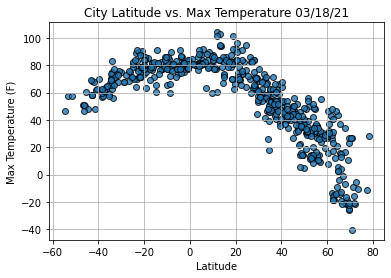

In [67]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

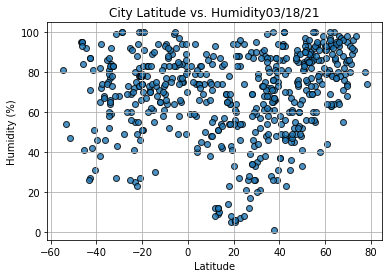

In [75]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

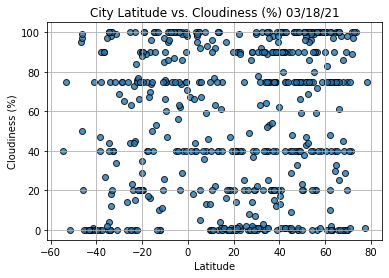

In [76]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

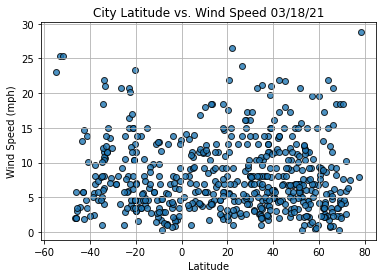

In [77]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()